# Weather Forecast

In this notebook, we will both work on regression and classification. 

We have a dataframe in which are registered weather caracteristics of a day.

We will make our models predict the minimum temperature of the day, and if it rained the next day.

# Summary

* Data Analysis
* Data Visualisation
* Machine Learning Classification
* Machine Learning Regression
* Conclusion

# Library

In [272]:
# Data Analysis
import numpy as np
import pandas as pd
import missingno as msno
from pandas import Series, DataFrame

# Data Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Machine Learning Library
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV

# Classification Metrics
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, precision_score

# Regression Metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

# Classification Models
import xgboost as xgb
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Regression Models
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

# OverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Other
from time import time
from warnings import filterwarnings
filterwarnings('ignore')

# Data Analysis

In [273]:
data = pd.read_csv("./resources/weather.csv", encoding='utf-8', sep=',')
data.drop_duplicates()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [274]:
columns = data.columns.tolist()
print("Dataframe features :\n", columns)

Dataframe features :
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']


## Infinite & Missing values

Percentage of missing values on each column :

WindDir9am       8.469945
WindSpeed9am     1.912568
Sunshine         0.819672
WindGustDir      0.819672
WindGustSpeed    0.546448
WindDir3pm       0.273224
MinTemp          0.000000
Pressure3pm      0.000000
RISK_MM          0.000000
RainToday        0.000000
Temp3pm          0.000000
Temp9am          0.000000
Cloud3pm         0.000000
Cloud9am         0.000000
Humidity9am      0.000000
Pressure9am      0.000000
Humidity3pm      0.000000
MaxTemp          0.000000
WindSpeed3pm     0.000000
Evaporation      0.000000
Rainfall         0.000000
RainTomorrow     0.000000
dtype: float64


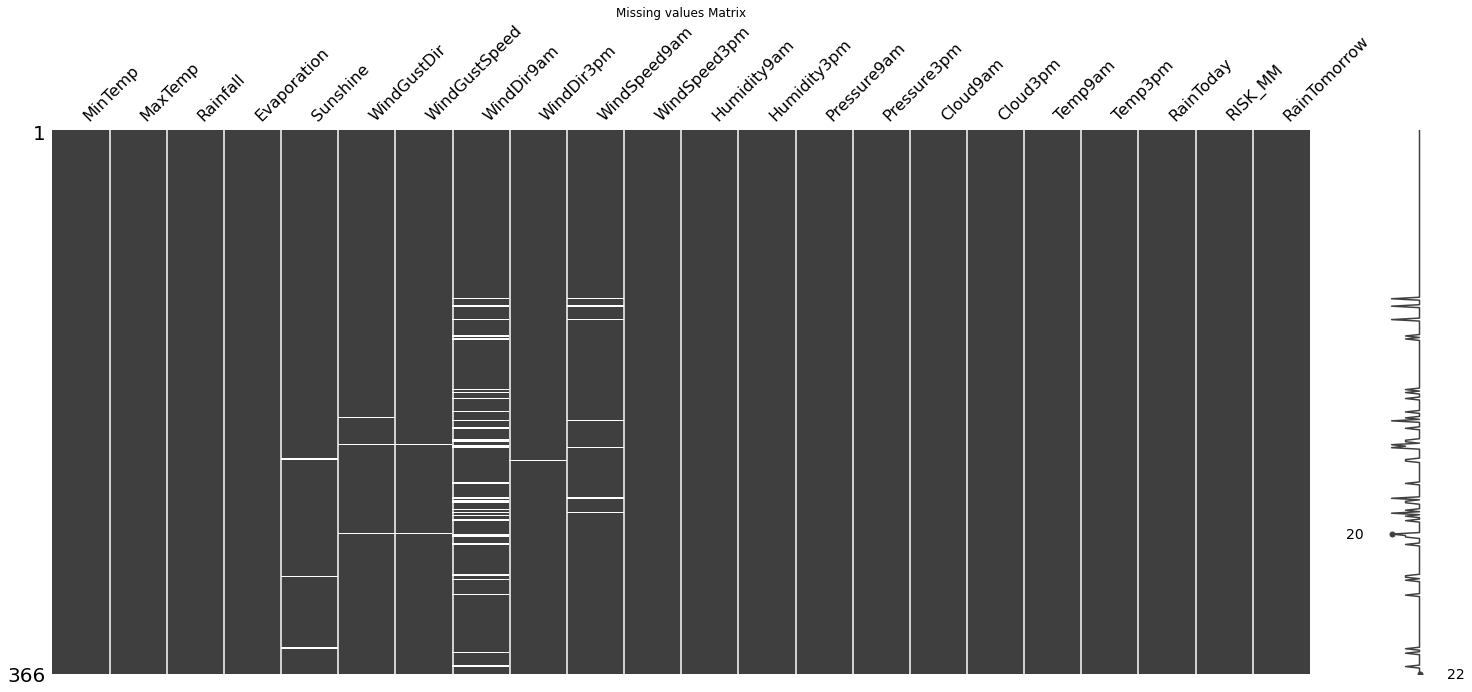

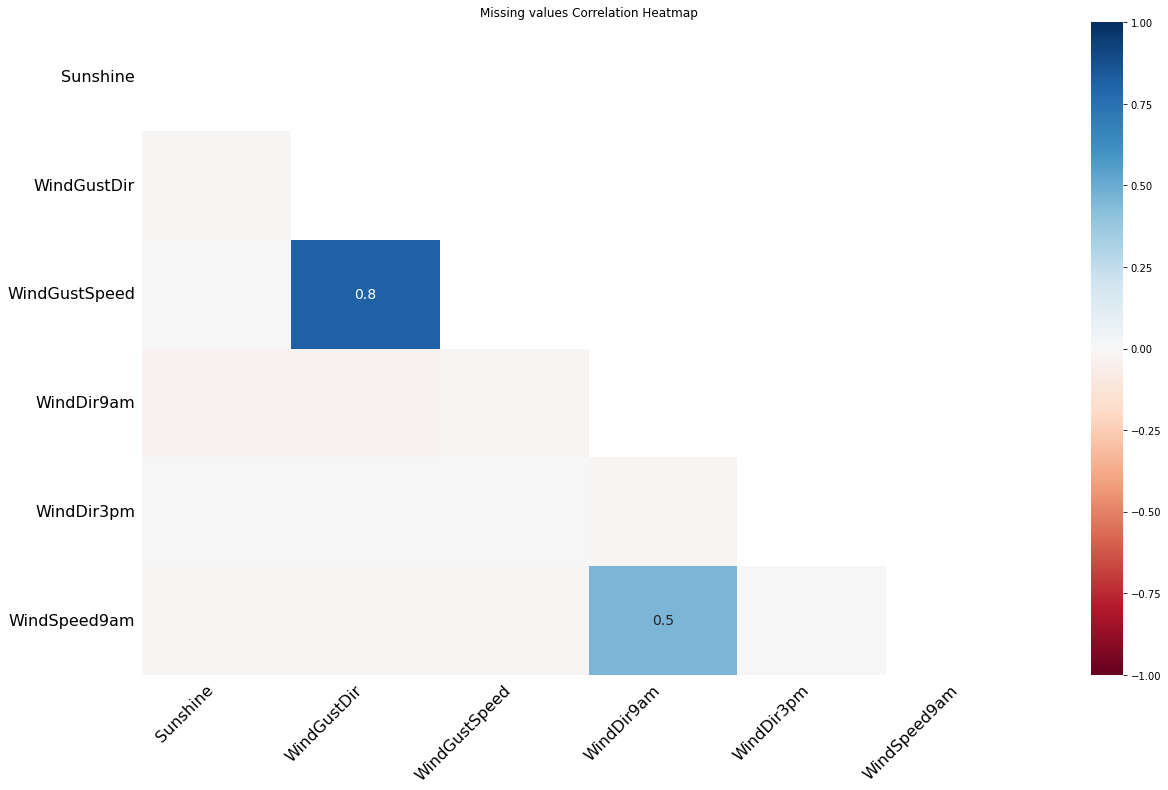

In [275]:
print("Percentage of missing values on each column :\n")
print(((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False))
msno.matrix(data)
plt.title("Missing values Matrix")
msno.heatmap(data)
plt.title("Missing values Correlation Heatmap")
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

# Correlations

In [276]:
corr_matrix = data.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.head(20)

MaxTemp        Temp3pm         0.988925
Pressure9am    Pressure3pm     0.966744
MinTemp        Temp9am         0.910805
MaxTemp        Temp9am         0.869609
Temp9am        Temp3pm         0.843509
Sunshine       Humidity3pm     0.760267
MinTemp        MaxTemp         0.745911
               Temp3pm         0.716051
Sunshine       Cloud9am        0.697603
Evaporation    Temp9am         0.688749
WindGustSpeed  WindSpeed3pm    0.687071
MaxTemp        Evaporation     0.673162
Sunshine       Cloud3pm        0.657198
Evaporation    Temp3pm         0.655896
MinTemp        Evaporation     0.634720
Humidity3pm    Temp3pm         0.569348
               Cloud9am        0.565174
WindGustSpeed  WindSpeed9am    0.540717
Humidity3pm    Cloud3pm        0.530715
Cloud9am       Cloud3pm        0.528296
dtype: float64

### LabelEncoding

In [277]:
# Does the dataframe have object type columns ?
print("-- Distribution of columns' type --")
print(data.dtypes.value_counts(), '\n')

object_col = data.select_dtypes(include=['object'])
object_cList = object_col.columns.tolist()
print(object_col, '\n')

# How many different labels would each column need ?
print("-- Number of different labels needed for each column --")
print('WindGustDir ', len(data['WindGustDir'].value_counts().index.tolist()))
print('WindDir9am', len(data['WindDir9am'].value_counts().index.tolist()))
print('WindDir3pm', len(data['WindDir3pm'].value_counts().index.tolist()))
print('RainToday', len(data['RainToday'].value_counts().index.tolist()))
print('RainTomorrow', len(data['RainTomorrow'].value_counts().index.tolist()))
print('\n')

# LabelEncoding
print("-- LabelEncoding --")
le = LabelEncoder()
le_count = 0

for col in data:
    if data[col].dtype == 'object' or data[col].dtype == 'string':
        le.fit(data[col])
        data[col] = le.transform(data[col])
        le_count += 1
        print(col)
data.reset_index()
print('%d columns were label encoded.' % le_count)

-- Distribution of columns' type --
float64    12
object      5
int64       5
dtype: int64 

    WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0            NW         SW         NW        No          Yes
1           ENE          E          W       Yes          Yes
2            NW          N        NNE       Yes          Yes
3            NW        WNW          W       Yes          Yes
4           SSE        SSE        ESE       Yes           No
..          ...        ...        ...       ...          ...
361         NNW        SSE         NW        No           No
362           N        NNW        NNW        No           No
363         ESE        ENE        ENE        No           No
364          NW        SSW        WNW        No           No
365          NW         NW        WNW        No           No

[328 rows x 5 columns] 

-- Number of different labels needed for each column --
WindGustDir  16
WindDir9am 16
WindDir3pm 16
RainToday 2
RainTomorrow 2


-- LabelEncoding --


In [278]:
data['RainTomorrow']
No = 0
Yes = 1

# Machine Learning

## Regression

In this part, we will make our models predict the minimum temperature of the day.

We'll use many different regressors to find which one is best suited for this task.

### Train Test data split

In [279]:
col_for_X = columns
col_for_X.remove('MinTemp')
X = data[col_for_X]
y = data['MinTemp']

### Scaling

In [280]:
# Scaling
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

### Models

In [281]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

### Models performance

In [282]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tRMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.001s
	Explained variance: 0.7585328273181098
	Mean absolute error: 2.3644444444444446
	RMSE: 2.9133340267664387

GradientBoostingRegressor()
	Training time: 0.067s
	Prediction time: 0.000s
	Explained variance: 0.8895327526850589
	Mean absolute error: 1.5371935327657917
	RMSE: 1.9723108925117958

ExtraTreesRegressor()
	Training time: 0.125s
	Prediction time: 0.008s
	Explained variance: 0.88094863991442
	Mean absolute error: 1.642929292929293
	RMSE: 2.046943644272671

RandomForestRegressor()
	Training time: 0.167s
	Prediction time: 0.006s
	Explained variance: 0.8820114080142912
	Mean absolute error: 1.5937373737373737
	RMSE: 2.0362343239966814

DecisionTreeRegressor()
	Training time: 0.003s
	Prediction time: 0.000s
	Explained variance: 0.7467529187104158
	Mean absolute error: 2.36969696969697
	RMSE: 3.010084062049773

LinearRegression()
	Training time: 0.000s
	Prediction time: 0.000s
	Explained variance: 0.921530368848647
	

## Classification

In this part, we will make our models predict if it will rain tomorrow or not.

We'll compare Logistic Regression, Decision Tree, Random Forest and KNeighbors.

We label encoded the column RainTomorrow : 0 = No , 1 = Yes.

### Unbalanced target column

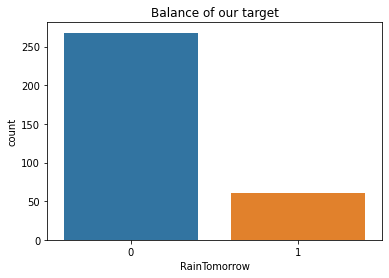

Unbalanced data on the RainTomorrow column:
0    268
1     60
Name: RainTomorrow, dtype: int64


In [288]:
fig = sns.countplot(x="RainTomorrow", data=data)
plt.title('Balance of our target')
plt.show()
print("Unbalanced data on the RainTomorrow column:")
print(data['RainTomorrow'].value_counts())

### Train Test data split

In [284]:
col_for_X = columns
col_for_X.remove('RainTomorrow')
X = data[col_for_X]
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

### Models

In [285]:
classifiers = [ 
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

### Models Performance

LogisticRegression()
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        18

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

Accuracy score: 100.0 %

Accuracy score using cross validation: 100.0 %



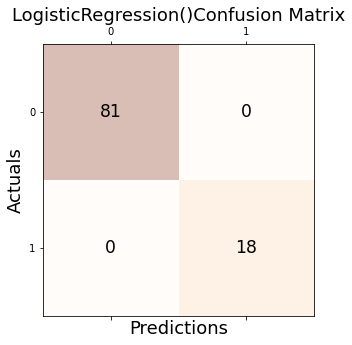

The confusion matrix shows us the number of :

* True positives : 81 

* True negatives : 0 

* False positives: 0 

* False negatives: 18 


DecisionTreeClassifier()
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        18

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

Accuracy score: 100.0 %

Accuracy score using cross validation: 100.0 %



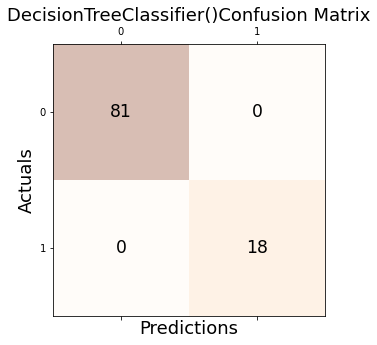

The confusion matrix shows us the number of :

* True positives : 81 

* True negatives : 0 

* False positives: 0 

* False negatives: 18 


RandomForestClassifier()
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        18

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

Accuracy score: 100.0 %

Accuracy score using cross validation: 100.0 %



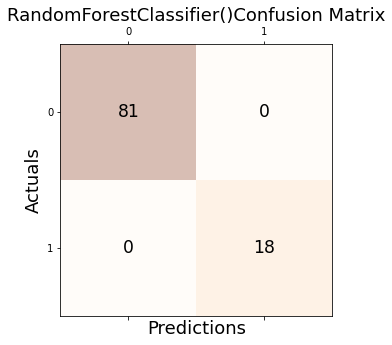

The confusion matrix shows us the number of :

* True positives : 81 

* True negatives : 0 

* False positives: 0 

* False negatives: 18 


KNeighborsClassifier()
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        81
           1       1.00      0.83      0.91        18

    accuracy                           0.97        99
   macro avg       0.98      0.92      0.95        99
weighted avg       0.97      0.97      0.97        99

Accuracy score: 96.97 %

Accuracy score using cross validation: 95.2 %



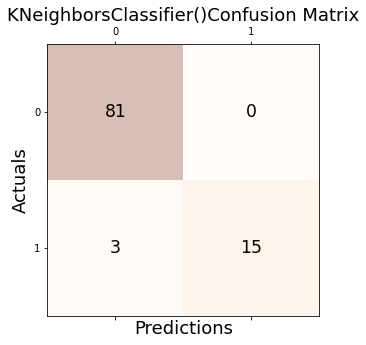

The confusion matrix shows us the number of :

* True positives : 81 

* True negatives : 0 

* False positives: 3 

* False negatives: 15 




In [287]:
head = 10
for model in classifiers[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("Classification report:\n", classification_report(y_test, y_pred))
    print("Accuracy score:", round((accuracy_score(y_test, y_pred)*100), 2), '%\n')
    print("Accuracy score using cross validation:", 
          round((cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean())*100, 2), '%\n')
    
    
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    title = str(model) + 'Confusion Matrix'
    plt.title(title, fontsize=18)
    plt.show()
    print('The confusion matrix shows us the number of :\n')
    print('* True positives :', conf_matrix[0][0] ,'\n')
    print('* True negatives :', conf_matrix[0][1],'\n')
    print('* False positives:', conf_matrix[1][0] ,'\n')
    print('* False negatives:', conf_matrix[1][1] ,'\n')
    print()

# Conclusion

Every classifiers we tried had good performances despite the unbalanced data in column 'RainTomorrow'.

However, our regressors 